Instagram posting rating


# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Importing the Dataset

In [2]:
data = pd.read_csv("../input/instagram-reach/instagram_reach.csv", encoding = 'latin1')
print(data.head())

   Unnamed: 0  S.No              USERNAME  \
0           0     1         mikequindazzi   
1           1     2       drgorillapaints   
2           2     3    aitrading_official   
3           3     4  opensourcedworkplace   
4           4     5           crea.vision   

                                             Caption  Followers  \
0  Who are #DataScientist and what do they do? >>...       1600   
1  We all know where itâs going. We just have t...        880   
2  Alexander Barinov: 4 years as CFO in multinati...        255   
3                                               sfad        340   
4  Ever missed a call while your phone was chargi...        304   

                                            Hashtags Time since posted  Likes  
0  #MachineLearning #AI #DataAnalytics #DataScien...          11 hours    139  
1  Â #deckÂ .#macÂ #macintosh#sayhelloÂ #appleÂ #...           2 hours     23  
2  #whoiswhoÂ #aitradingÂ #aiÂ #aitradingteam#ins...           2 hours     25  
3  #io

# Checking null values

In [3]:
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [4]:
data = data.dropna()

In [5]:
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         94 non-null     int64 
 1   S.No               94 non-null     int64 
 2   USERNAME           94 non-null     object
 3   Caption            94 non-null     object
 4   Followers          94 non-null     int64 
 5   Hashtags           94 non-null     object
 6   Time since posted  94 non-null     object
 7   Likes              94 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.6+ KB


# Analyzing Instagram Reach

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


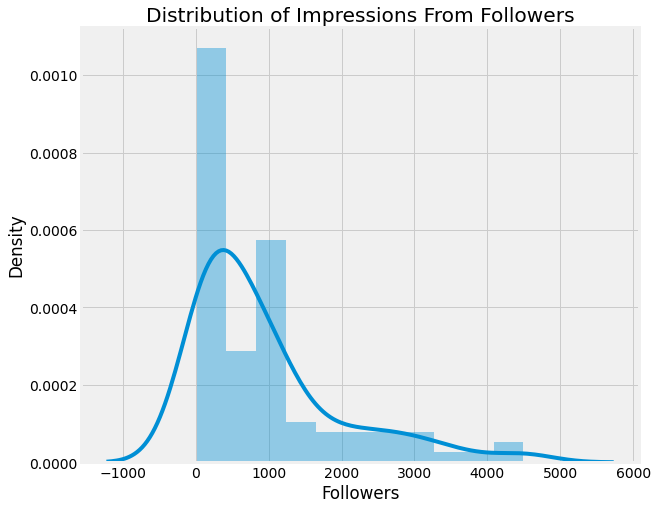

In [7]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Followers")
sns.distplot(data['Followers'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


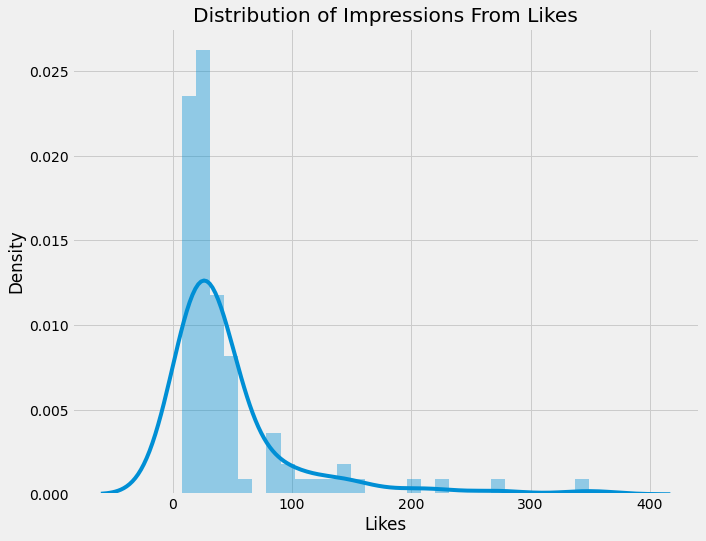

In [8]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Likes")
sns.distplot(data['Likes'])
plt.show()

# Relation between Likes and Followers

In [9]:
followers = data["Followers"].sum()
likes = data["Likes"].sum()

labels = ['Followers', 'Likes']
values = [followers, likes]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

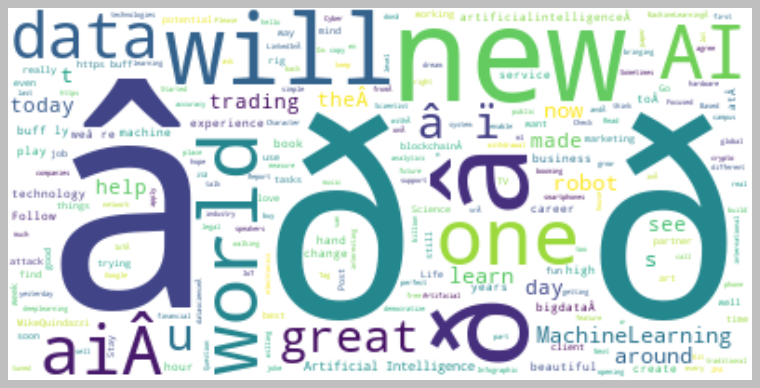

In [10]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

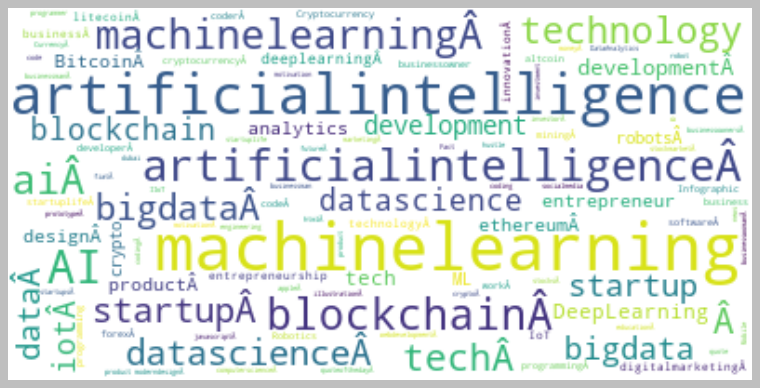

In [11]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
figure = px.scatter(data_frame = data, x="Likes",
                    y="Followers", trendline="ols", 
                    title = "Relationship Between Likes and Followers")
figure.show()

In [13]:
conversion_rate = (data["Likes"].sum() / data["Followers"].sum()) * 100
print(conversion_rate)

5.0797341067861455


### So we can see here that the conversion rate is mere 5.08% 